In [25]:
import yaml
import pickle

i = 0
data_path = "/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/29923559/lc.fluxes"
gp_path = "/Users/lgrcia/code/studies/paper-nuance/workflows/real_injection_recovery/data/29923559/gp.yaml"

data = pickle.load(open(data_path, "rb"))
gp_params = yaml.full_load(open(gp_path, "r"))


In [26]:
import pickle

import jax
import numpy as np
import yaml
from nuance.kernels import rotation
import matplotlib.pyplot as plt

data = pickle.load(open(data_path, "rb"))
gp_params = yaml.full_load(open(gp_path, "r"))

build_gp, init = rotation(data["star_period"], np.mean(data["error"]), long_scale=0.5)
gp = build_gp(gp_params, data["time"])

In [27]:
from nuance import Nuance

nu = Nuance(data["time"], data["flux"], gp=gp)


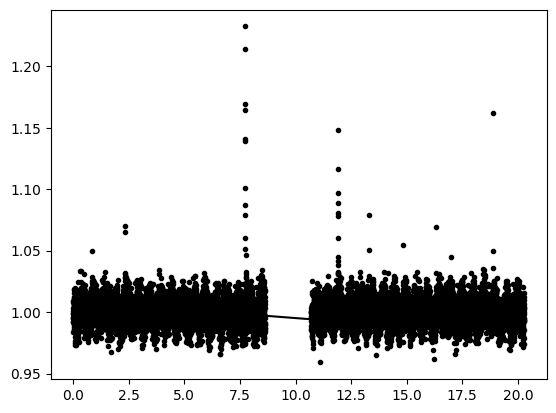

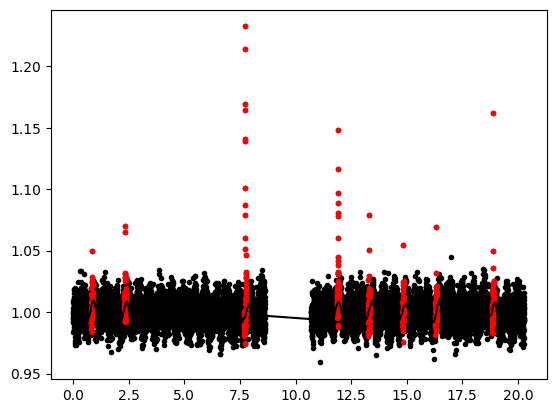

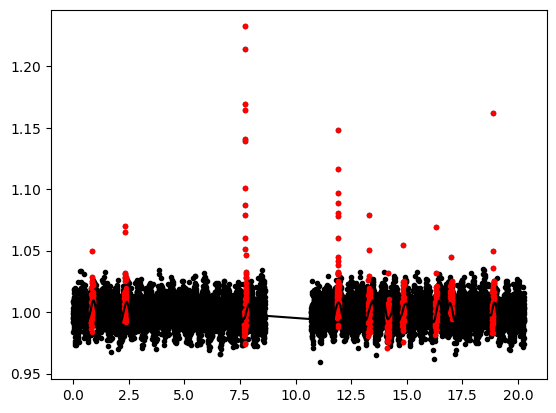

In [29]:
def mask_flares(time, flux, iterations=3, sigma=4, gp=None):
    _, mu, _ = nu.gp_optimization(build_gp)

    mask = np.ones_like(time).astype(bool)
    window = 30

    for _ in range(iterations):
        m = mu(gp_params)
        r = flux - m
        mask_up = r < np.std(r[mask]) * sigma

        # mask around flares
        ups = np.flatnonzero(~mask_up)
        if len(ups) > 0:
            mask[
                np.hstack(
                    [
                        np.arange(max(u - window, 0), min(u + window, len(time)))
                        for u in ups
                    ]
                )
            ] = False
        _, mu, _ = nu.gp_optimization(build_gp, mask)

    return ~mask


mask = ~mask_flares(data["time"], data["flux"], gp=gp)

cleaned_data = data.copy()
cleaned_data["flux"] = data["flux"][mask]
cleaned_data["time"] = data["time"][mask]
cleaned_data["error"] = data["error"][mask]

m = mask


In [10]:
m

array([False, False, False, ..., False, False, False])

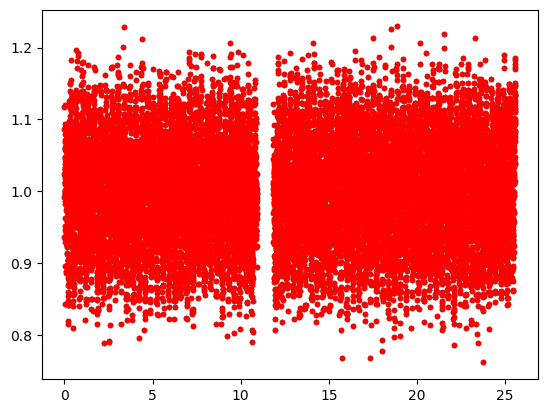

In [9]:
import matplotlib.pyplot as plt

# plot time series and masked data points
plt.plot(data["time"], data["flux"], "k.")
plt.plot(data["time"][~m], data["flux"][~m], "r.")


In [7]:
import yaml
from nuance.kernels import rotation

build_gp, init = rotation(data["star_period"], np.mean(data["error"]), long_scale=0.5)
gp = build_gp(gp_params, data["time"])


In [ ]:
import matp
